# Task 3: Customer Segmentation / Clustering

Perform customer segmentation using clustering techniques. Use both profile information
(from Customers.csv) and transaction information (from Transactions.csv).

● You have the flexibility to choose any clustering algorithm and any number of clusters in
between(2 and 10)

● Calculate clustering metrics, including the DB Index(Evaluation will be done on this).

● Visualise your clusters using relevant plots.

**Deliverables:**

 1.A report on your clustering results, including
 
 2.The number of clusters formed.
 
 3.DB Index value.
 
 2. Other relevant clustering metrics.
 
● A Jupyter Notebook/Python script containing your clustering code.

**Evaluation Criteria:**

● Clustering logic and metrics.

● Visual representation of clusters.

# Overview
The goal of this task is to segment customers into distinct groups based on their profile information (from the Customers.csv file) and transaction history (from the Transactions.csv file). These groups will be formed using clustering techniques such as K-Means or DBSCAN. We'll also evaluate the clusters using clustering metrics, particularly the Davies-Bouldin Index (DB Index). Finally, we'll visualize the clusters for easy interpretation.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load customer and transaction data
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')


In [3]:
# Display the first few rows of the data
customers.head(), transactions.head()

(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55         1   
 3        T00272      C0087      P067  2024-03-26 22:55:37         2   
 4        T00363      C0070      P067  2024-03-21 15:10:10         3   
 
    TotalValue   Price  
 0      300.68  300.68  
 1      300.68  300.68  
 2      300.68  300.68  
 3      601.36  300.68  
 4      902.04  300.68  )

# 2. Feature Engineering and Data Merging

In [4]:
# Feature Engineering: Aggregating transactions data by CustomerID
transaction_summary = transactions.groupby('CustomerID').agg(
    TotalSpent=('TotalValue', 'sum'),
    TotalTransactions=('TransactionID', 'count')
).reset_index()

# Merging customer profile data with transaction summary
customer_data = pd.merge(customers, transaction_summary, on='CustomerID', how='left')

# Display the first few rows of the merged dataset
customer_data.head()


,CustomerID,CustomerName,Region,SignupDate,TotalSpent,TotalTransactions
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,5.0
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,4.0
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,4.0
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,8.0
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,3.0


# 3.Data Preprocessing (Encoding and Missing Value Handling)

In [5]:
# Encoding categorical features such as Region
customer_data = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)

# Handling missing values (fill with 0 for customers with no transactions)
customer_data.fillna(0, inplace=True)

# Display the processed data
customer_data.head()


,CustomerID,CustomerName,SignupDate,TotalSpent,TotalTransactions,Region_Europe,Region_North America,Region_South America
0,C0001,Lawrence Carroll,2022-07-10,3354.52,5.0,False,False,True
1,C0002,Elizabeth Lutz,2022-02-13,1862.74,4.0,False,False,False
2,C0003,Michael Rivera,2024-03-07,2725.38,4.0,False,False,True
3,C0004,Kathleen Rodriguez,2022-10-09,5354.88,8.0,False,False,True
4,C0005,Laura Weber,2022-08-15,2034.24,3.0,False,False,False


# 4. Feature Scaling

In [8]:
print(customer_data.columns)


Index(['CustomerID', 'CustomerName', 'SignupDate', 'TotalSpent',
       'TotalTransactions', 'Region_Europe', 'Region_North America',
       'Region_South America'],
      dtype='object')


In [9]:
# Convert non-numeric columns (e.g., 'Billing Date') to datetime if needed
customer_data['SignupDate'] = pd.to_datetime(customer_data['SignupDate'], errors='coerce')
# Select only numeric columns for scaling
numeric_data = customer_data.select_dtypes(include=['float64', 'int64'])

# Scale the numeric columns using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Display scaled data (first 5 rows)
scaled_data[:5]


array([[-0.05188436,  0.        ],
       [-0.86271433, -0.45129368],
       [-0.393842  , -0.45129368],
       [ 1.03537505,  1.35388105],
       [-0.76949861, -0.90258736]])

# 5. K-Means Clustering

In [11]:
#K-Means Clustering

# Applying K-Means Clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Display cluster assignments for first few customers
customer_data[['CustomerID', 'Cluster']].head()


C:\Users\dubey\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CustomerID,Cluster
0,C0001,2
1,C0002,0
2,C0003,0
3,C0004,1
4,C0005,0


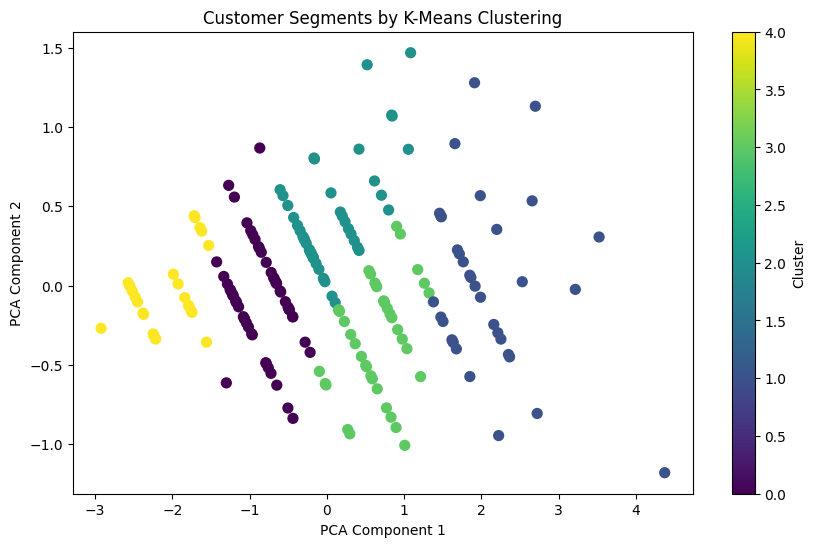

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce the features to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Add the PCA components to the customer data
customer_data['PCA1'] = pca_components[:, 0]
customer_data['PCA2'] = pca_components[:, 1]

# Plot the clusters using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(customer_data['PCA1'], customer_data['PCA2'], c=customer_data['Cluster'], cmap='viridis', s=50)
plt.title('Customer Segments by K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


# 6.Evaluation using Davies-Bouldin Index

In [14]:
# Evaluating the clustering using Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, customer_data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.8558190404999962


# 7. Visualizing Clusters using PCA



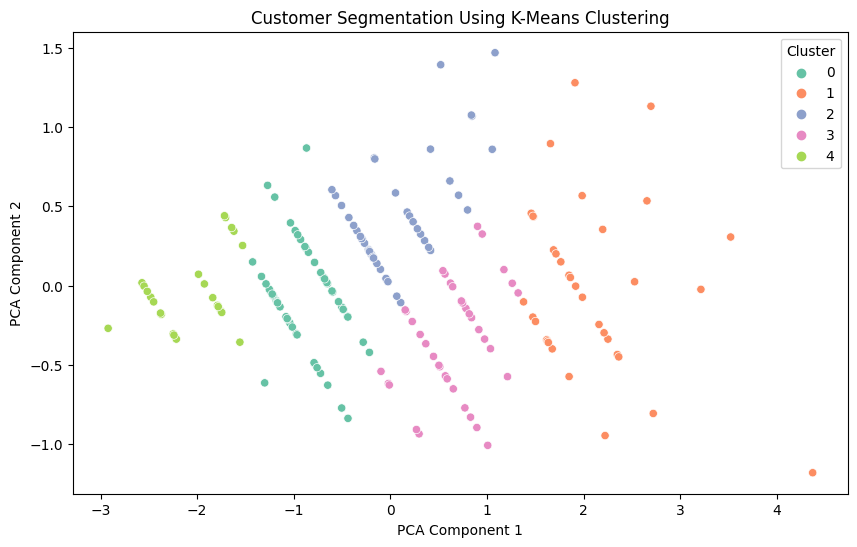

In [17]:
# Reducing dimensions using PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_data['Cluster'], palette='Set2')
plt.title('Customer Segmentation Using K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()


# Elbow Method (to determine the optimal number of clusters)

C:\Users\dubey\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dubey\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dubey\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dubey\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

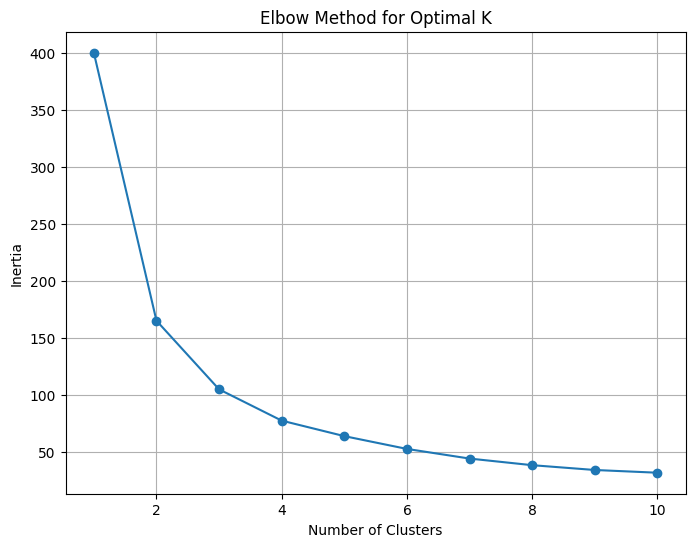

In [21]:
# Elbow Method for determining the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


# Silhouette Score Plot (measures how similar an object is to its own cluster compared to other clusters)

C:\Users\dubey\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dubey\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dubey\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dubey\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

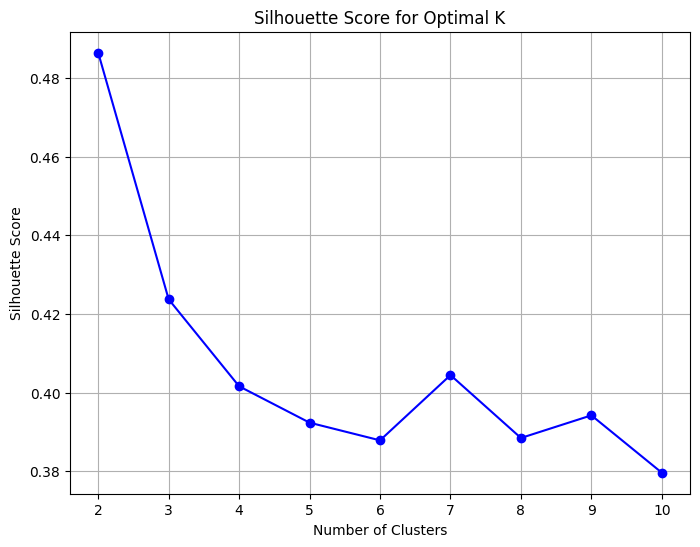

In [22]:
from sklearn.metrics import silhouette_score

# Silhouette Score for evaluating clustering
sil_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    sil_scores.append(silhouette_score(scaled_data, kmeans.labels_))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o', color='b')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


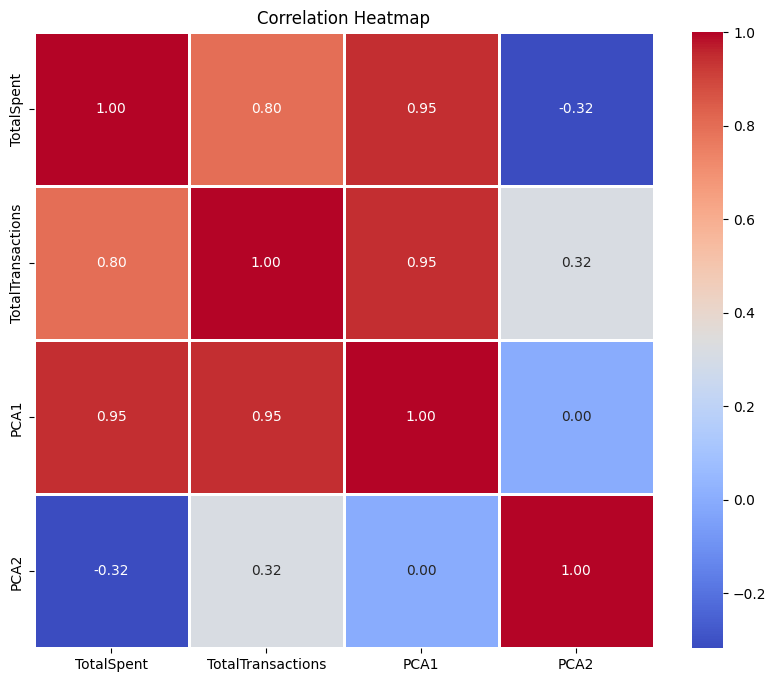

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Excluding non-numeric columns for correlation calculation
numeric_data = customer_data.select_dtypes(include=['float64', 'int64'])

# Plotting Correlation Heatmap
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()



# t-SNE Visualization (dimensionality reduction technique like PCA but better for visualizing clusters)

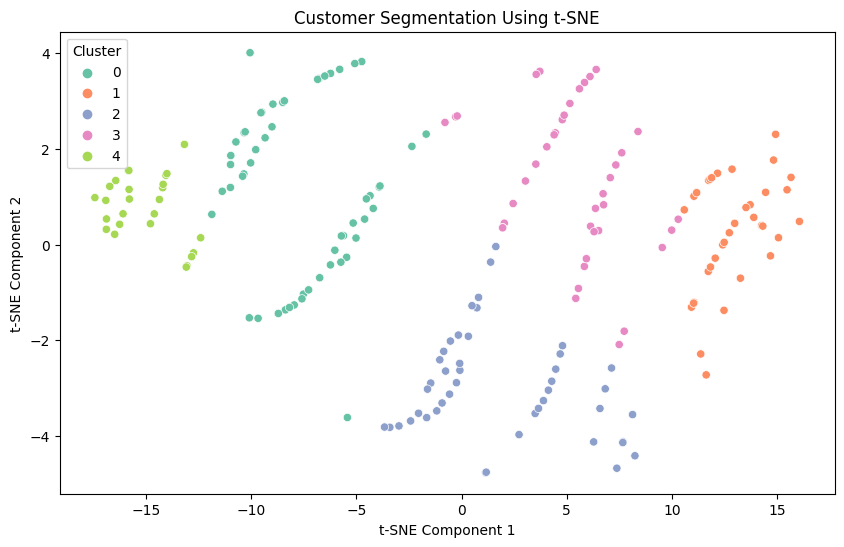

In [25]:
from sklearn.manifold import TSNE

# t-SNE for better cluster visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_components[:, 0], y=tsne_components[:, 1], hue=customer_data['Cluster'], palette='Set2')
plt.title('Customer Segmentation Using t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()


# Dendrogram (Hierarchical Clustering)

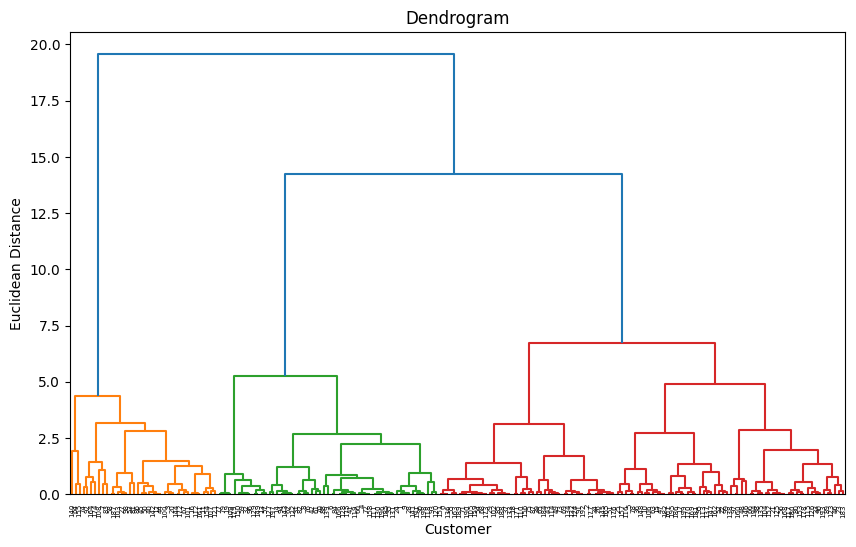

In [26]:
import scipy.cluster.hierarchy as sch

# Create Dendrogram for hierarchical clustering
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean Distance')
plt.show()
